In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [4]:
from sklearn.metrics import classification_report,r2_score,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [5]:
import json
import os

In [6]:
kaggle_config = json.load(open('/content/kaggle(1).json'))

In [7]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [8]:
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [9]:
! kaggle datasets download "gaurav2022/mobile-health"

Dataset URL: https://www.kaggle.com/datasets/gaurav2022/mobile-health
License(s): CC0-1.0
  0% 0.00/35.5M [00:00<?, ?B/s]
100% 35.5M/35.5M [00:00<00:00, 1.05GB/s]


In [10]:
!ls

'kaggle(1).json'   mobile-health.zip   sample_data


In [11]:
import zipfile
with zipfile.ZipFile('/content/mobile-health.zip','r') as zip_ref:
  zip_ref.extractall()

In [12]:
dataset = pd.read_csv('/content/mhealth_raw_data.csv')

In [13]:
dataset.head()

alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity   subject  
0  0.187760 -0.44902 -1.0103  0.034483         0  subject1  
1  0.023595 -0.44902 -1.0103  0.034483         0  subject1  
2  0.275720 -0.44902 -1.0103  0.034483         0  subject1  
3  0.367520 -0.45686 -1.0082  0.025862         0  subject1  
4  0.407290 -0.45686 -1.0082  0.025862         0  subject1

In [14]:
dataset.tail()

alx     aly      alz      glx      gly      glz     arx     ary  \
1215740  1.7849 -9.8287  0.29725 -0.34137 -0.90056 -0.61493 -3.7198 -8.9071   
1215741  1.8687 -9.8766  0.46236 -0.34137 -0.90056 -0.61493 -3.7160 -8.7455   
1215742  1.6928 -9.9290  0.16631 -0.34137 -0.90056 -0.61493 -3.8824 -9.1155   
1215743  1.5279 -9.6306  0.30458 -0.34137 -0.90056 -0.61493 -3.5564 -9.1441   
1215744  1.6614 -9.8398  0.18088 -0.33210 -0.90432 -0.61886 -3.9035 -8.9324   

             arz       grx      gry      grz  Activity    subject  
1215740  0.29423  0.041176 -0.99384 -0.48060         0  subject10  
1215741  0.44814  0.041176 -0.99384 -0.48060         0  subject10  
1215742  0.45048  0.041176 -0.99384 -0.48060         0  subject10  
1215743  0.59488  0.041176 -0.99384 -0.48060         0  subject10  
1215744  0.76171  0.035294 -1.02050 -0.47198         0  subject10

In [15]:
dataset.shape

(1215745, 14)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [17]:
dataset.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [18]:
dataset.duplicated().sum()

np.int64(0)

<Axes: xlabel='Activity'>

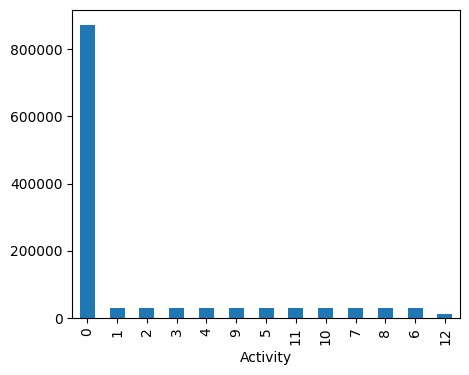

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
dataset['Activity'].value_counts().plot.bar()

In [20]:
dataset['Activity'].value_counts()

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
5      30720
11     30720
10     30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

In [21]:
dataset_activity_0=dataset[dataset['Activity']==0]
dataset_activity_else = dataset[dataset['Activity']!=0]

In [22]:
print(dataset_activity_0)

            alx     aly      alz       glx      gly      glz     arx     ary  \
0        2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1        2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2        2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3        2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4        2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   
...         ...     ...      ...       ...      ...      ...     ...     ...   
1215740  1.7849 -9.8287  0.29725 -0.341370 -0.90056 -0.61493 -3.7198 -8.9071   
1215741  1.8687 -9.8766  0.46236 -0.341370 -0.90056 -0.61493 -3.7160 -8.7455   
1215742  1.6928 -9.9290  0.16631 -0.341370 -0.90056 -0.61493 -3.8824 -9.1155   
1215743  1.5279 -9.6306  0.30458 -0.341370 -0.90056 -0.61493 -3.5564 -9.1441   
1215744  1.6614 -9.8398  0.18088 -0.332100 -0.90432 -0.61886 -3.9035 -8.9324   

              arz       grx      gry   

In [23]:
dataset_activity_0 = dataset_activity_0.sample(n=40000)
dataset=pd.concat([dataset_activity_0,dataset_activity_else])

<Axes: xlabel='Activity'>

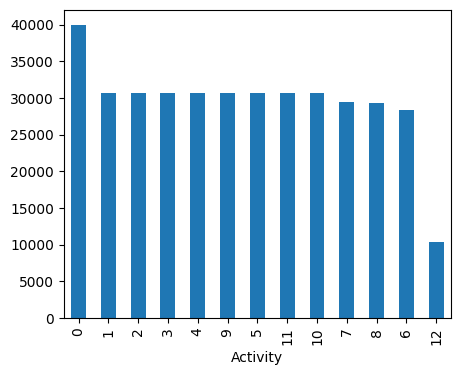

In [24]:
plt.figure(figsize=(5,4))
dataset['Activity'].value_counts().plot.bar()

In [25]:
len(dataset)

383195

In [26]:
dataset['Activity'].value_counts()

Activity
0     40000
1     30720
2     30720
3     30720
4     30720
9     30720
5     30720
11    30720
10    30720
7     29441
8     29337
6     28315
12    10342
Name: count, dtype: int64

In [27]:
activity_labels={
    0:'None',
    1: 'Standing still (1 min)',
    2: 'Sitting and relaxing (1 min)',
    3: 'Lying down (1 min)',
    4: 'Walking (1 min)',
    5: 'Climbing stairs (1 min)',
    6: 'Waist bends forward (20x)',
    7: 'Frontal elevation of arms (20x)',
    8: 'Knees bending (crouching) (20x)',
    9: 'Cycling (1 min)',
    10:'Jogging (1 min)',
    11:'Running (1 min)',
    12:'Jump front & back (20x) '
}

======================Standing still (1 min)-a=========================


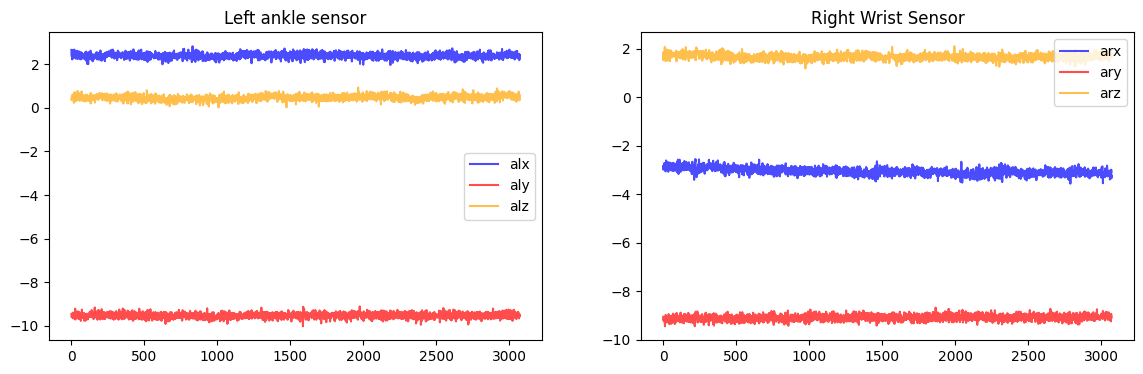

======================Standing still (1 min)-g=========================


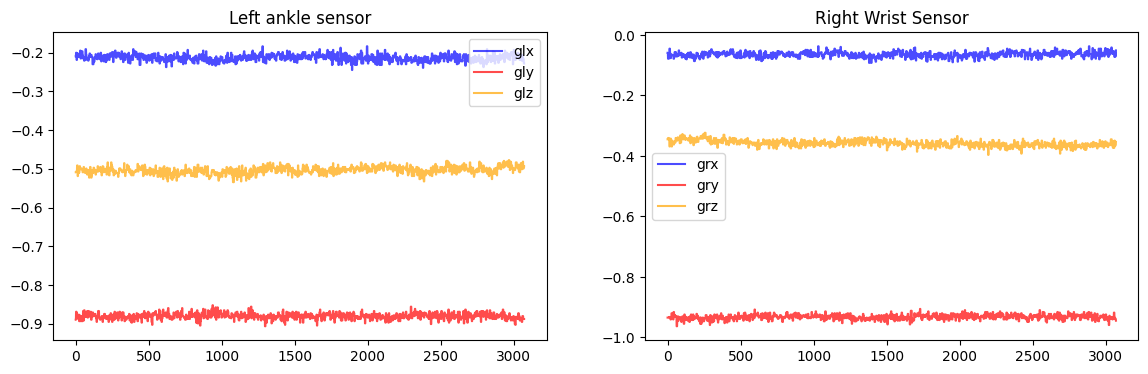

======================Sitting and relaxing (1 min)-a=========================


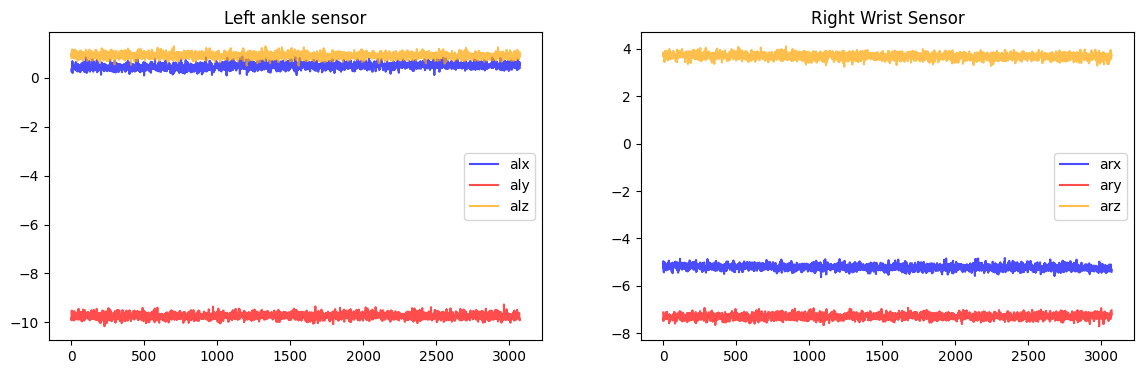

======================Sitting and relaxing (1 min)-g=========================


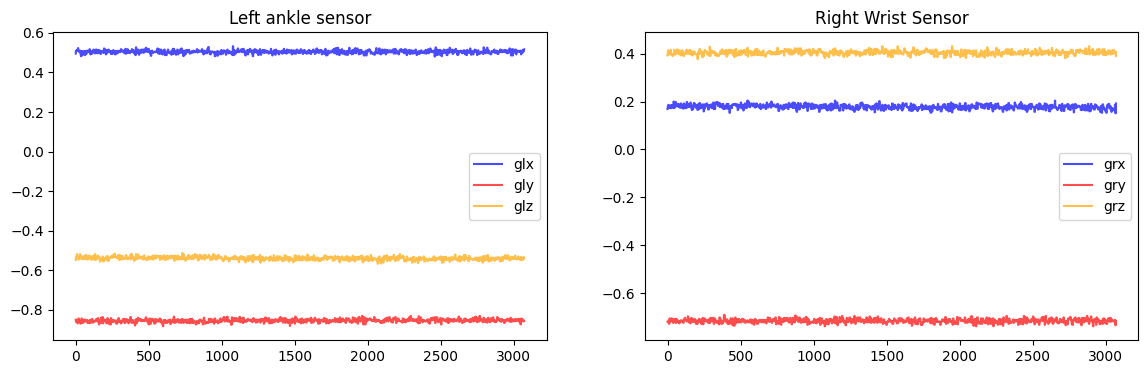

======================Lying down (1 min)-a=========================


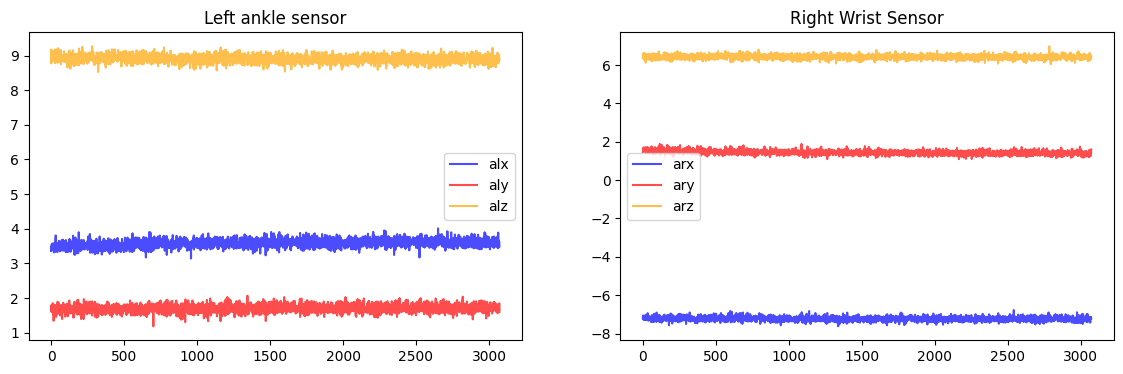

======================Lying down (1 min)-g=========================


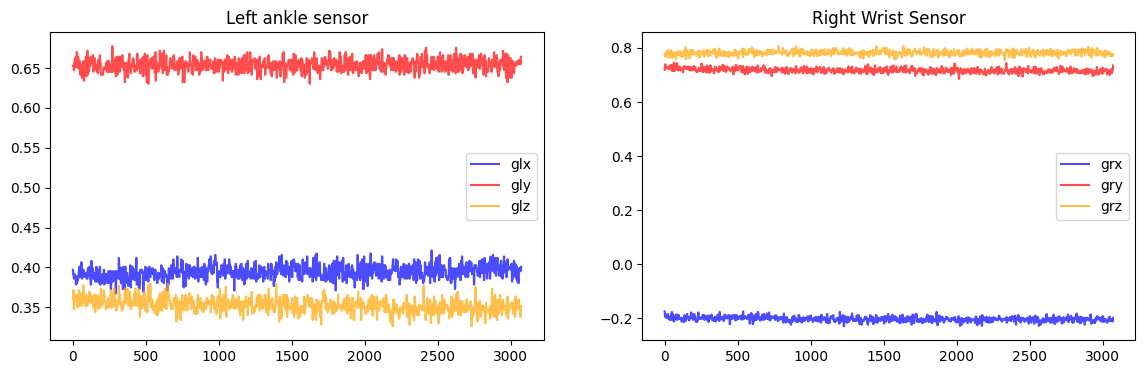

======================Walking (1 min)-a=========================


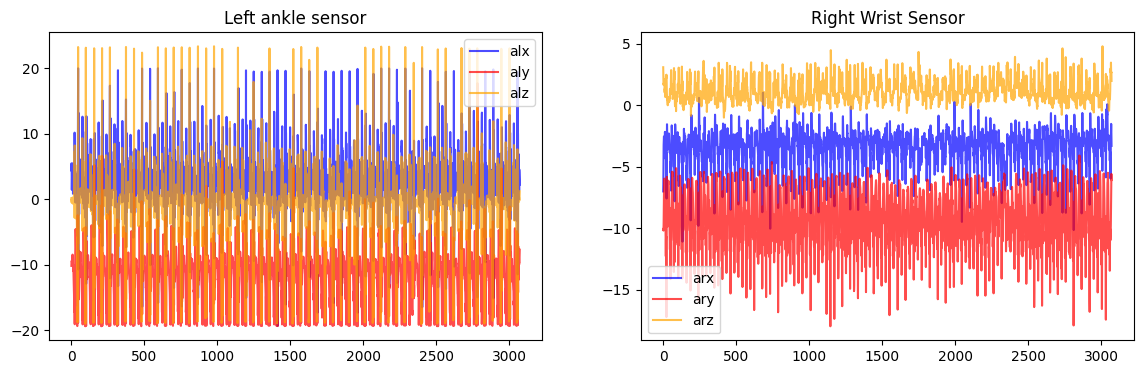

======================Walking (1 min)-g=========================


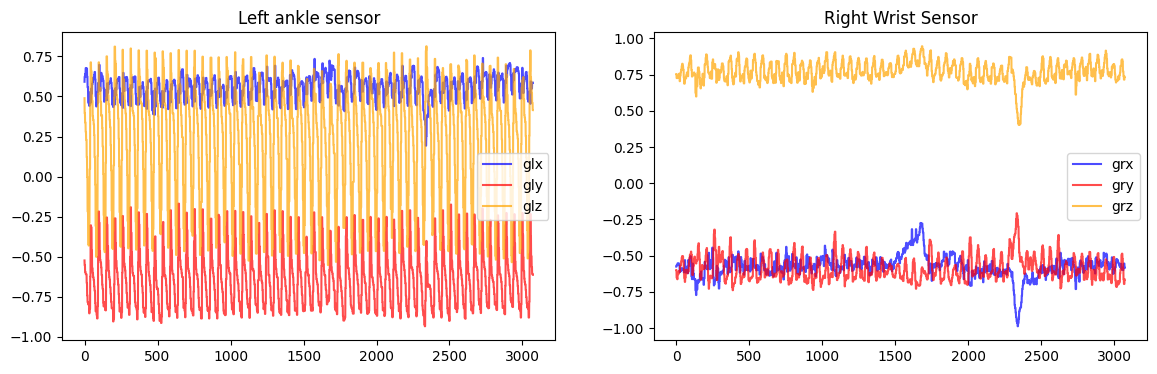

======================Climbing stairs (1 min)-a=========================


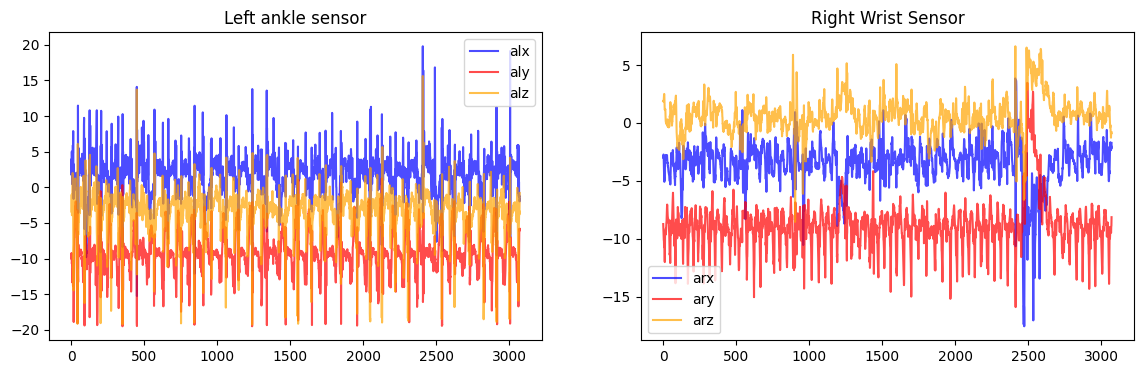

======================Climbing stairs (1 min)-g=========================


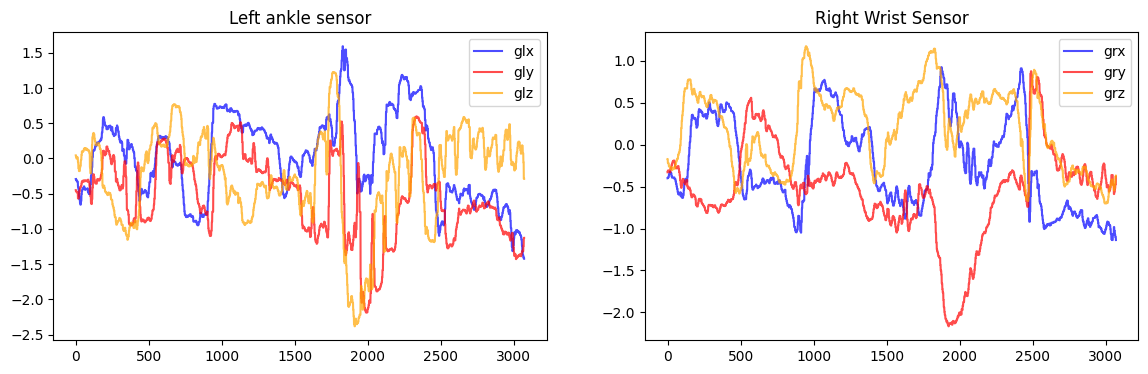

======================Waist bends forward (20x)-a=========================


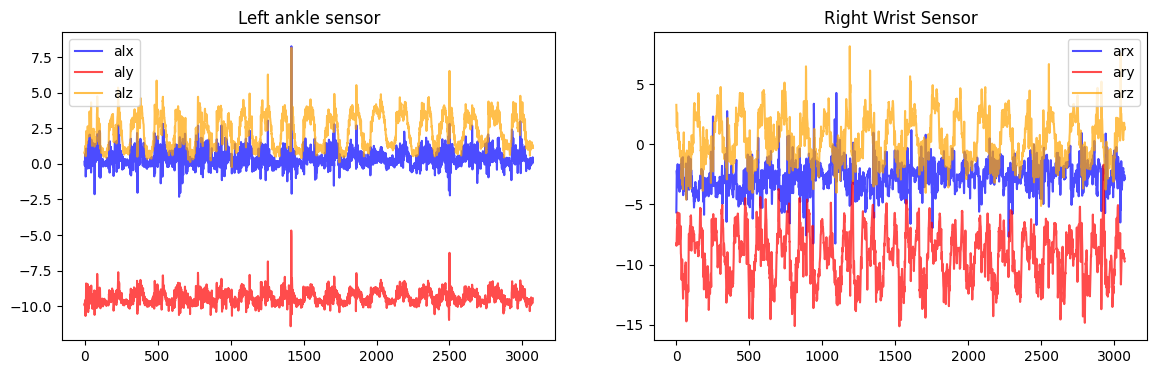

======================Waist bends forward (20x)-g=========================


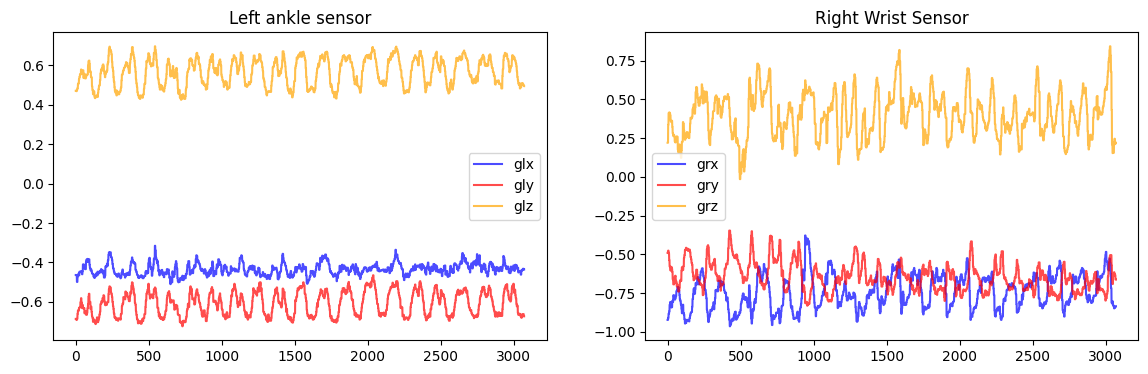

======================Frontal elevation of arms (20x)-a=========================


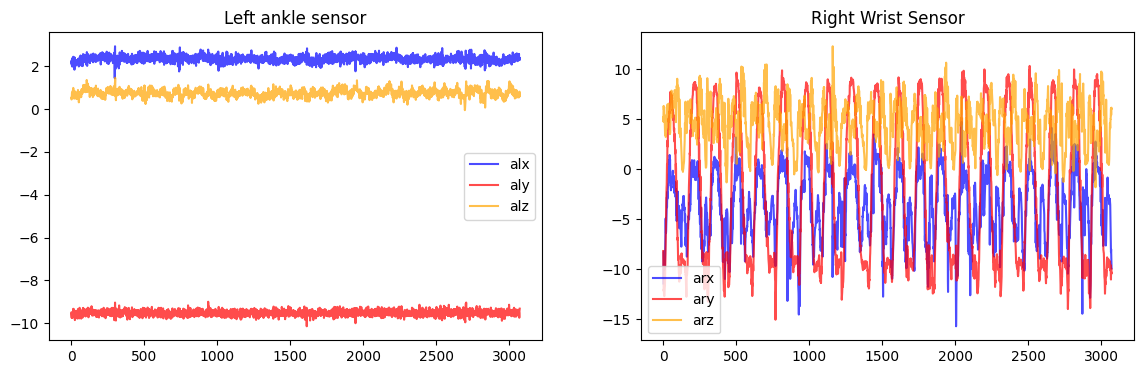

======================Frontal elevation of arms (20x)-g=========================


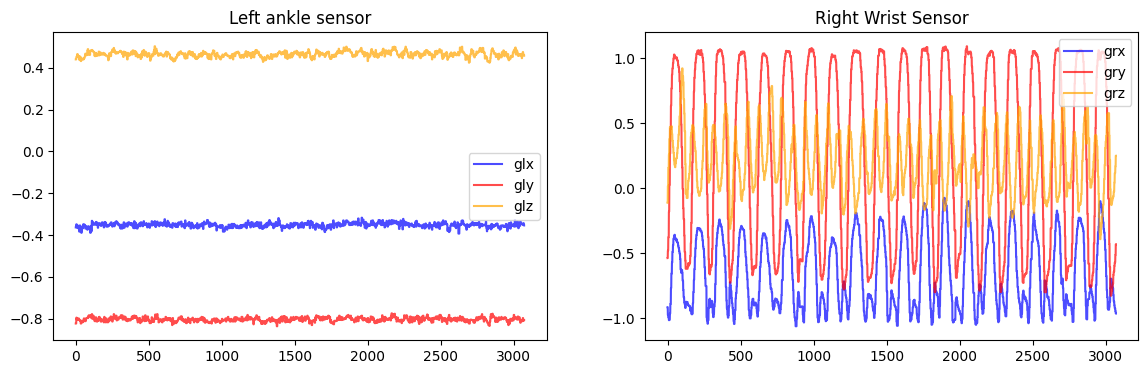

======================Knees bending (crouching) (20x)-a=========================


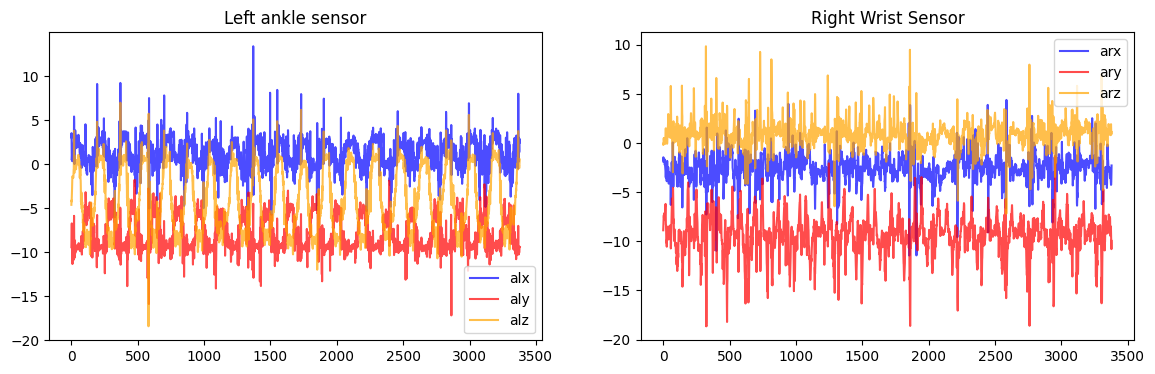

======================Knees bending (crouching) (20x)-g=========================


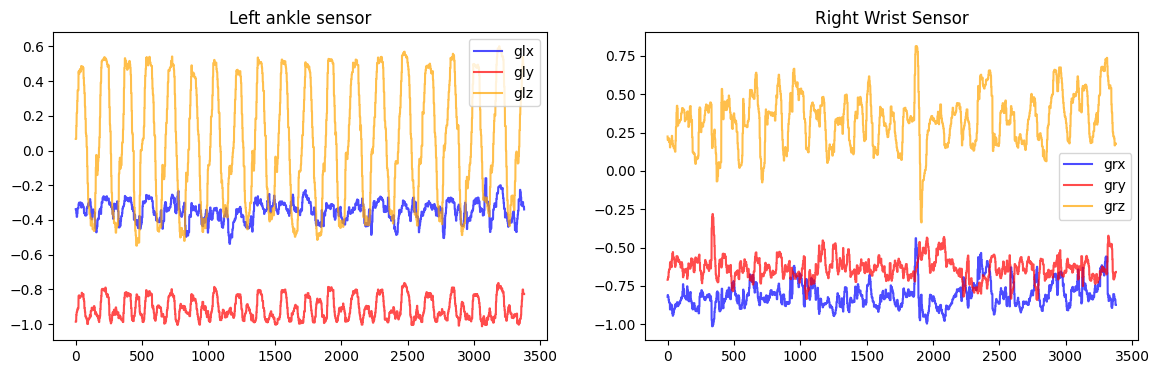

======================Cycling (1 min)-a=========================


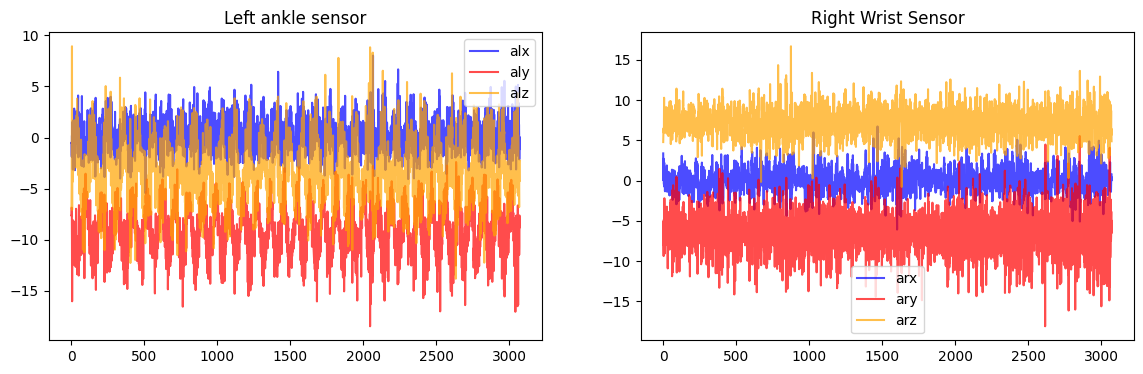

======================Cycling (1 min)-g=========================


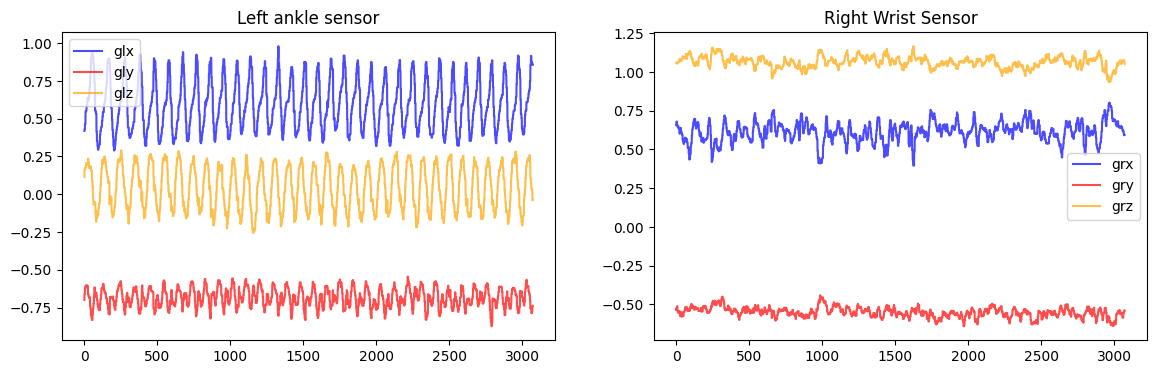

======================Jogging (1 min)-a=========================


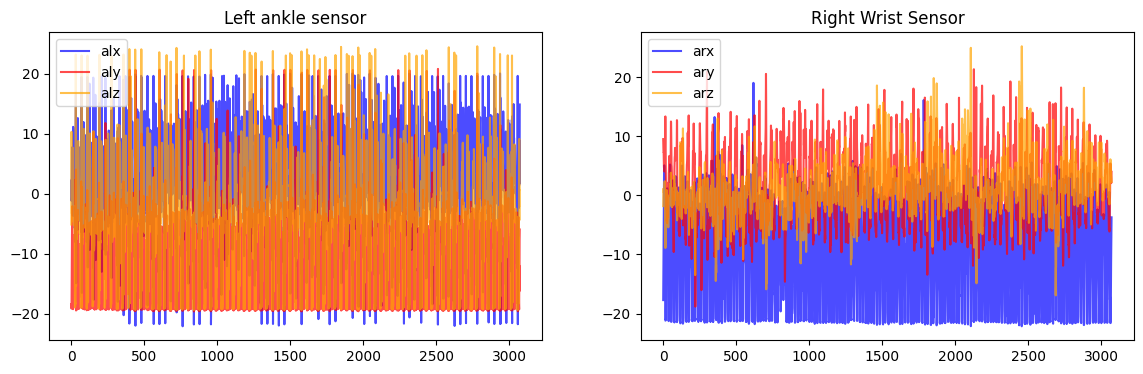

======================Jogging (1 min)-g=========================


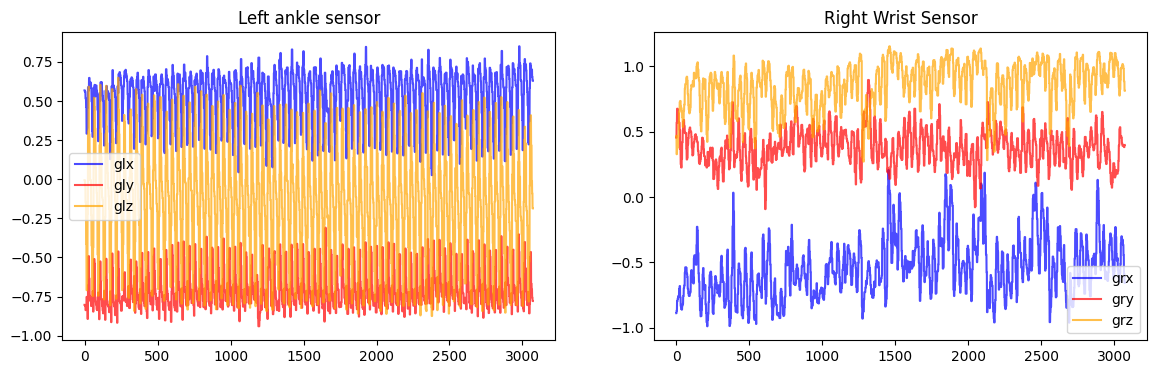

======================Running (1 min)-a=========================


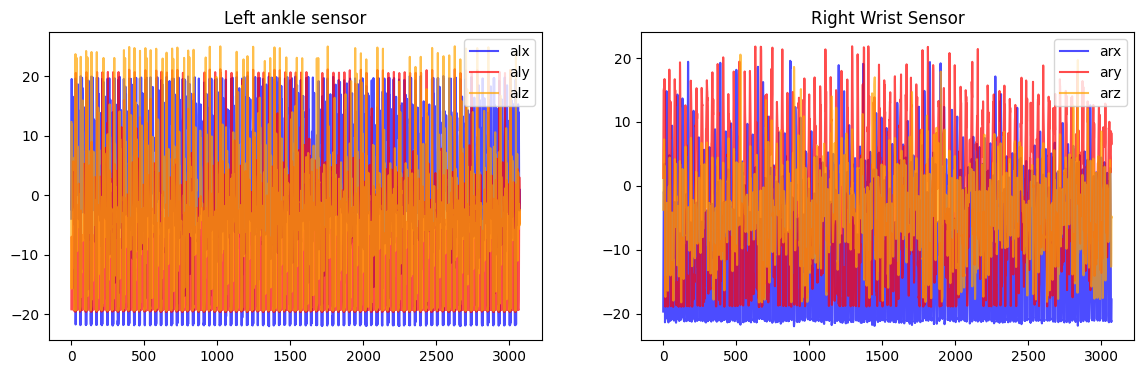

======================Running (1 min)-g=========================


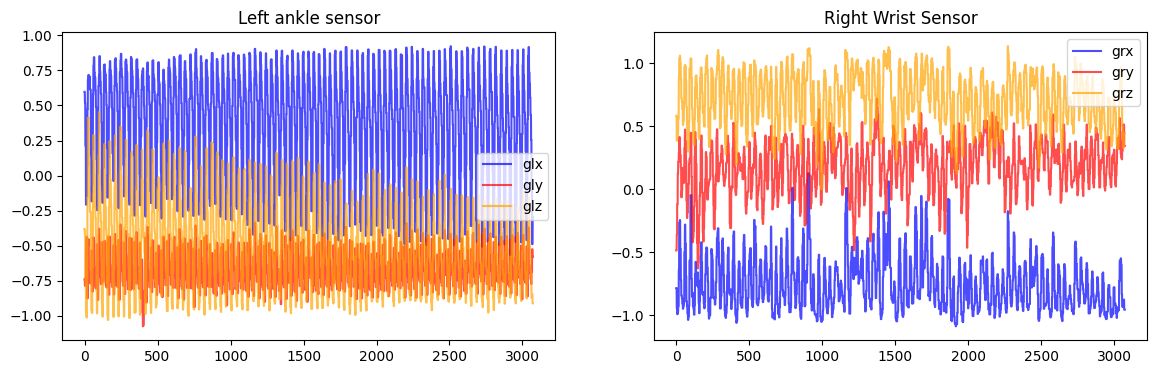

======================Jump front & back (20x) -a=========================


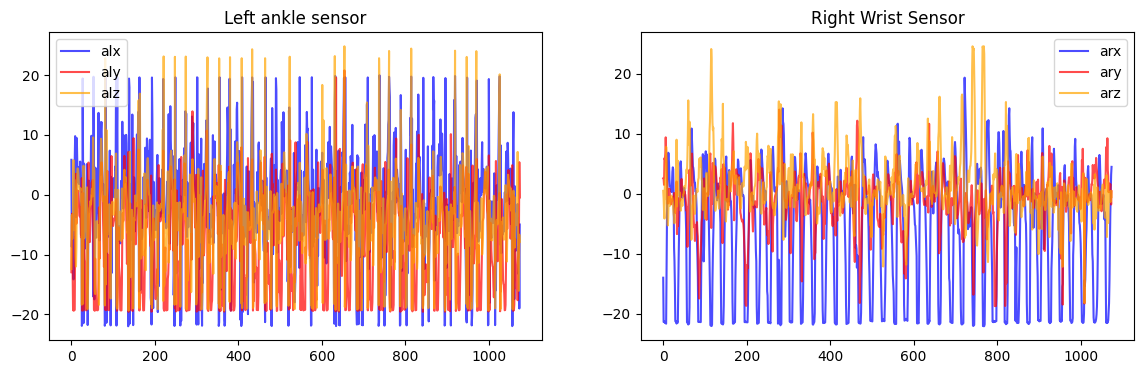

======================Jump front & back (20x) -g=========================


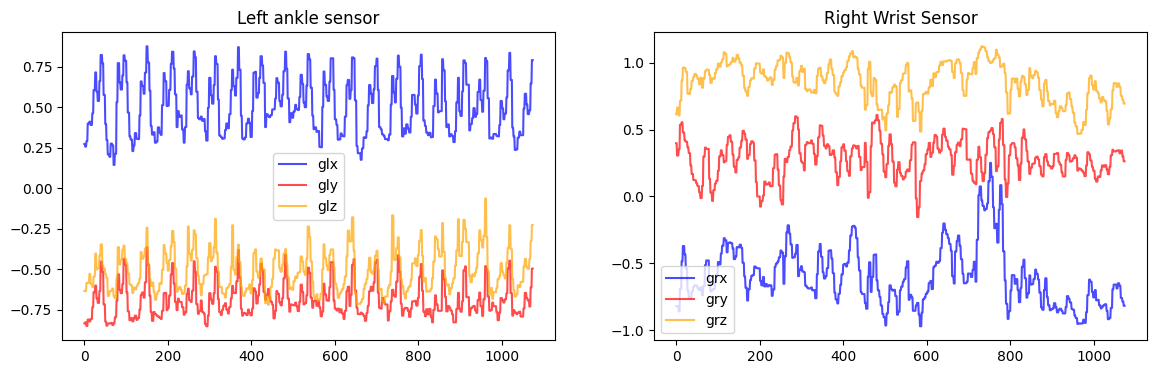

In [28]:
subject1 = dataset[dataset['subject'] == 'subject1']
readings = ['a','g']
for i in range(1,13):
  for r in readings:
    print(f"======================{activity_labels[i]}-{r}=========================")
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"lx"],color='blue',alpha=0.7,label=r+"lx")
    plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"ly"],color='red',alpha=0.7,label=r+"ly")
    plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"lz"],color='orange',alpha=0.7,label=r+"lz")
    plt.title("Left ankle sensor")
    plt.legend()


    plt.subplot(1,2,2)
    plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"rx"],color='blue',alpha=0.7,label=r+"rx")
    plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"ry"],color='red',alpha=0.7,label=r+"ry")
    plt.plot(subject1[subject1['Activity']==i].reset_index(drop=True)[r+"rz"],color='orange',alpha=0.7,label=r+"rz")
    plt.title("Right Wrist Sensor")
    plt.legend()
    plt.show()

In [29]:
dataset['Activity'] = dataset['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],['None',
     'Standing still (1 min)',
     'Sitting and relaxing (1 min)',
     'Lying down (1 min)',
     'Walking (1 min)',
     'Climbing stairs (1 min)',
     'Waist bends forward (20x)',
     'Frontal elevation of arms (20x)',
     'Knees bending (crouching) (20x)',
     'Cycling (1 min)',
    'Jogging (1 min)',
    'Running (1 min)',
    'Jump front & back (20x) '])

In [30]:
dataset['Activity']

1047203                        None
404859                         None
718693                         None
403168                         None
1140521                        None
                     ...           
1213641    Jump front & back (20x) 
1213642    Jump front & back (20x) 
1213643    Jump front & back (20x) 
1213644    Jump front & back (20x) 
1213645    Jump front & back (20x) 
Name: Activity, Length: 383195, dtype: object

In [31]:
dataset['Activity'].value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Climbing stairs (1 min)            30720
Running (1 min)                    30720
Jogging (1 min)                    30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: count, dtype: int64

<Axes: ylabel='count'>

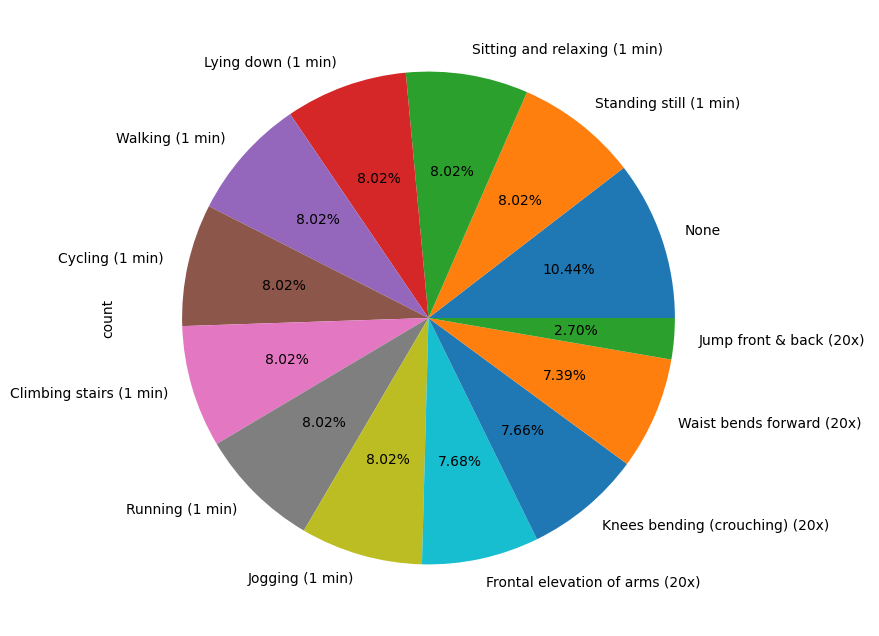

In [32]:
plt.figure(figsize=(12,8))
round(dataset['Activity'].value_counts()/dataset.shape[0]*100,2).plot.pie(autopct="%.2f%%")

In [33]:
dataset1 = dataset.copy()
columns = [col for col in dataset1.columns if col not in ['Activity','subject']]
for feature in columns:
  Q1 = dataset1[feature].quantile(0.25)
  Q3 = dataset1[feature].quantile(0.75)
  IQR = Q3-Q1
  lower_range = Q1-1.5*IQR
  upper_range = Q3+1.5*IQR
  dataset1 = dataset1[(dataset1[feature]>lower_range) & (dataset1[feature]<upper_range)]
print("shape : ",dataset1.shape)

shape :  (177715, 14)


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
dataset['subject'] = le.fit_transform(dataset['subject'])
dataset['Activity'] = le.fit_transform(dataset['Activity'])

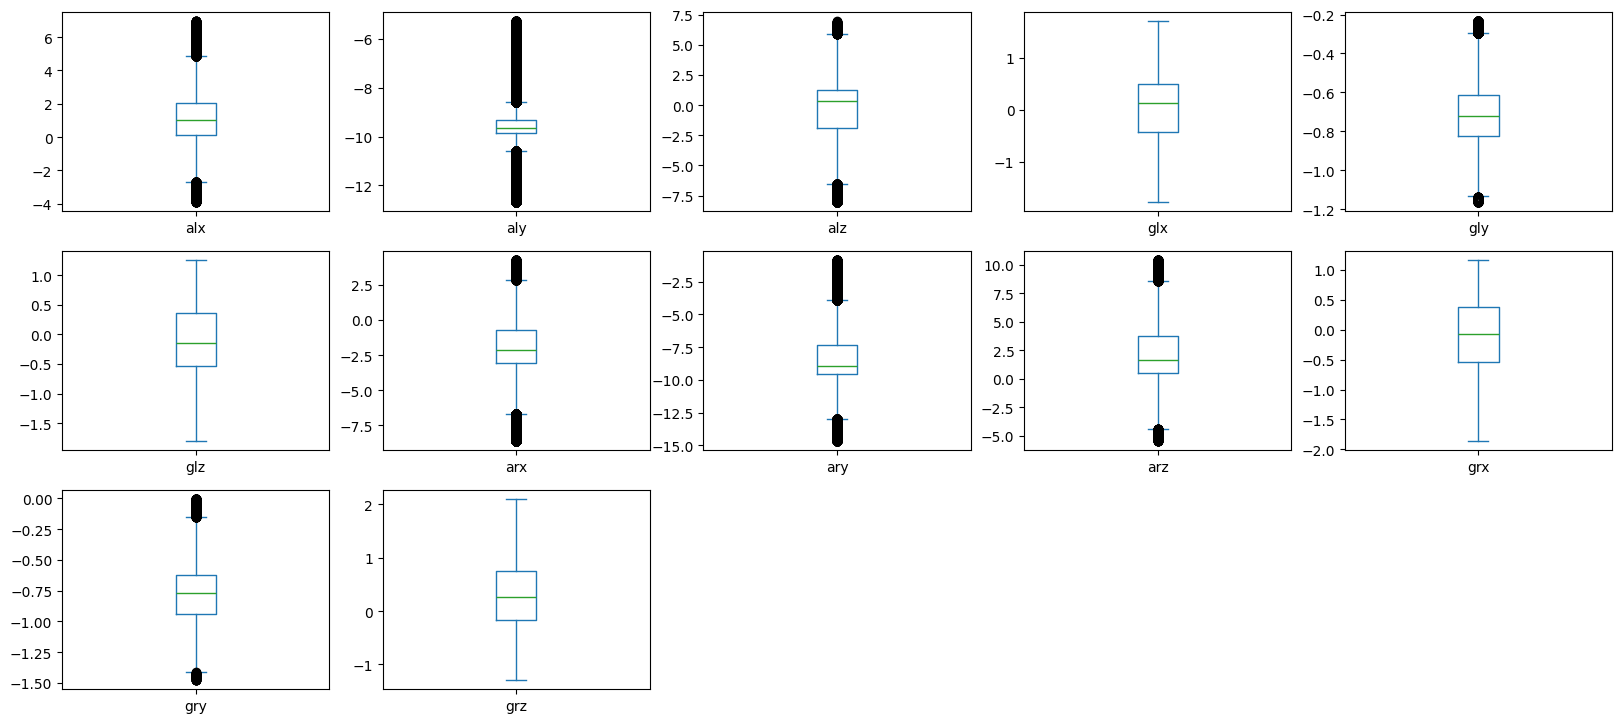

In [36]:
dataset1.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,15))
plt.show()

In [37]:
X = dataset.drop(columns = ['Activity','subject'],axis=1)
Y = dataset['Activity']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [39]:
# Robust Scaler standarizes the data in the way that is less sensitive to outliers

In [40]:
ro_scaler = RobustScaler().fit(X_train)
X_train_scaled = ro_scaler.transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

Building Model

In [79]:
def resultSummarizer(y_true,y_pred,cm=True):
  cm_matrix  = confusion_matrix(y_true,y_pred)
  acc = accuracy_score(y_true,y_pred)
  prec = precision_score(y_true,y_pred,average = 'macro')
  rec = sensitivity = recall_score(y_true,y_pred,average = 'macro')
  f1  = f1_score(y_true,y_pred,average = 'macro')
  if cm:
    plt.figure(figsize=(15,15))
    sns.heatmap(cm_matrix,annot=True,cmap='Blues',fmt='0.2f',xticklabels=activity_labels.values(),yticklabels=activity_labels.values())
    plt.title('Confusion Matrix')
    plt.show()

  print(f'Accuracy Score : ' + '{:.4%}'.format(acc))
  print(f'Precision Score : ' + '{:.4%}'.format(prec))
  print(f'Recall Score : ' + '{:.4%}'.format(rec))
  print(f'f1 Score : ' + '{:.4%}'.format(f1))


In [53]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
lr.score(X_train,Y_train)

0.5443866699722074

In [56]:
lr.score(X_test,Y_test)

0.5449053354036457

In [57]:
lr2 = LogisticRegression()
lr2.fit(X_train_scaled,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
lr2.score(X_train_scaled,Y_train)

0.5525320006785057

In [59]:
lr2.score(X_test_scaled,Y_test)

0.5529821631284333

In [60]:
X_test_prediction = lr2.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


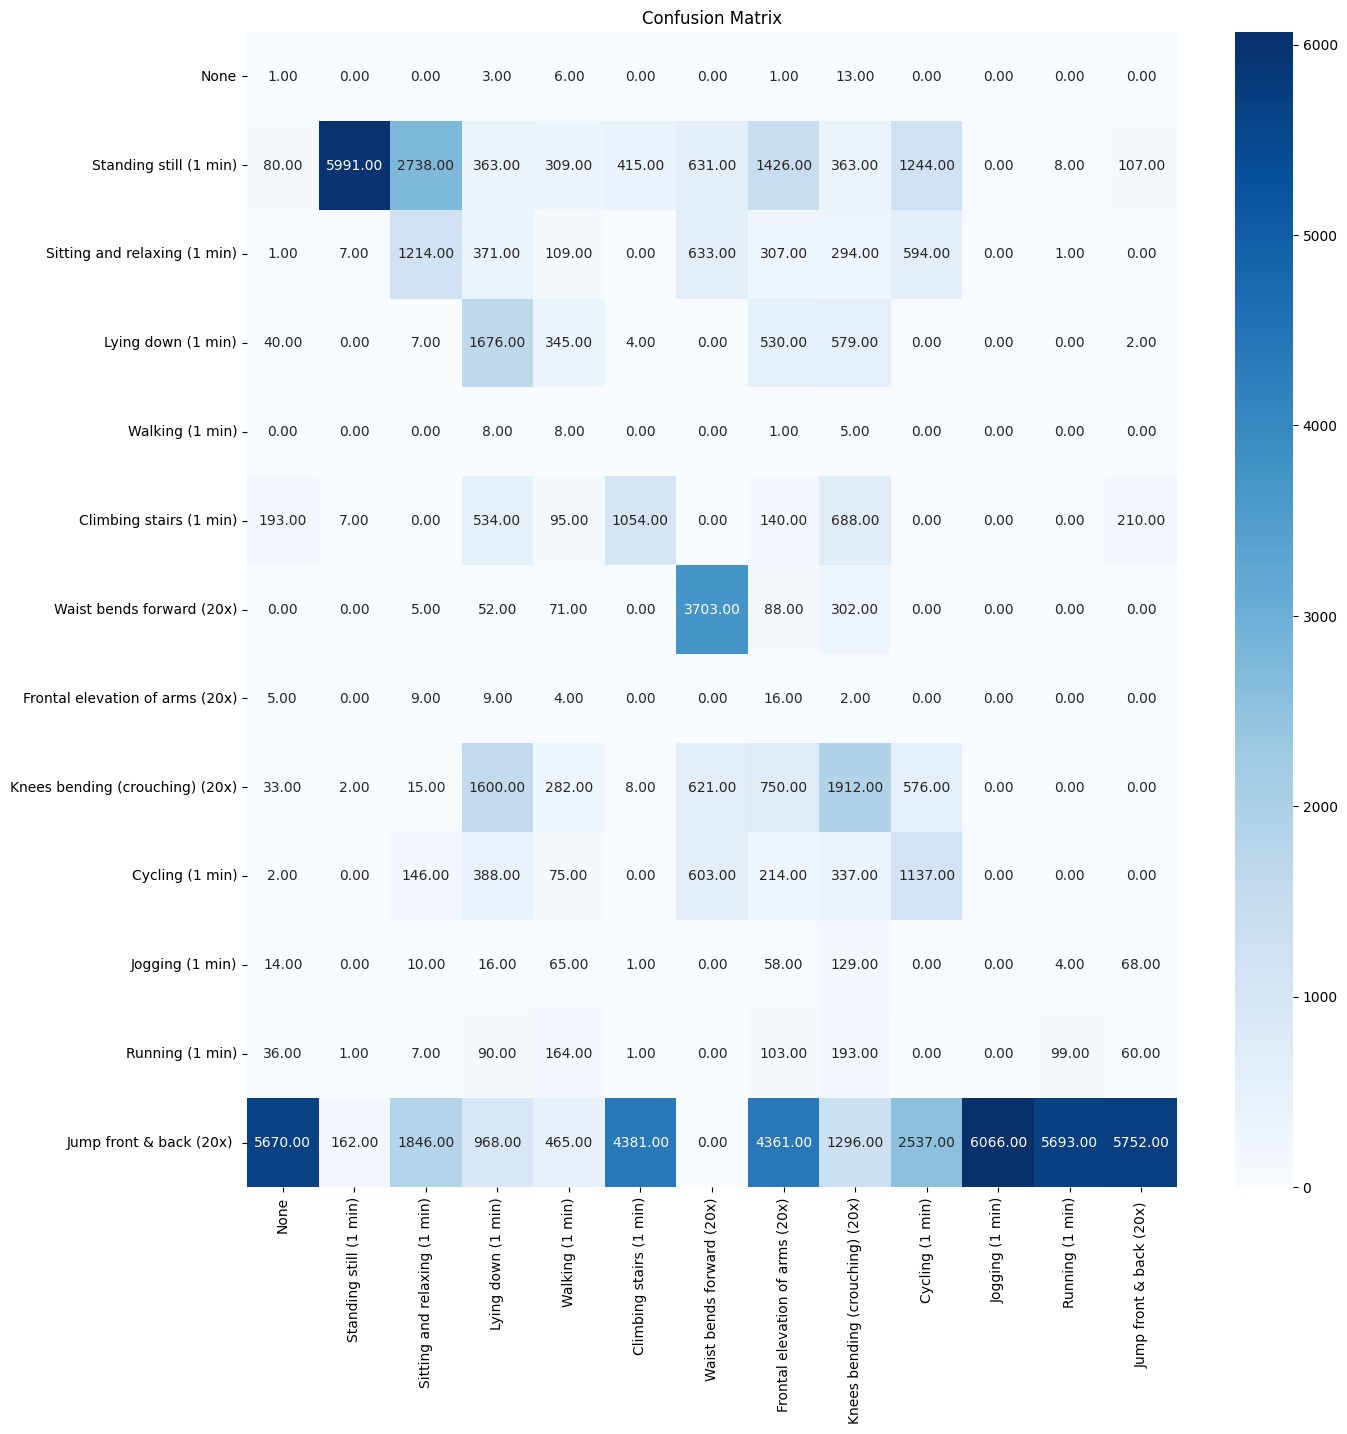

              precision    recall  f1-score   support

           0       0.00      0.04      0.00        24
           1       0.97      0.44      0.60     13675
           2       0.20      0.34      0.25      3531
           3       0.28      0.53      0.36      3183
           4       0.00      0.36      0.01        22
           5       0.18      0.36      0.24      2921
           6       0.60      0.88      0.71      4221
           7       0.00      0.36      0.00        45
           8       0.31      0.33      0.32      5799
           9       0.19      0.39      0.25      2902
          10       0.00      0.00      0.00       365
          11       0.02      0.13      0.03       754
          12       0.93      0.15      0.25     39197

    accuracy                           0.29     76639
   macro avg       0.28      0.33      0.23     76639
weighted avg       0.74      0.29      0.35     76639



In [61]:
resultSummarizer(X_test_prediction,Y_test)

In [63]:
 print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.00      0.04      0.00        24
           1       0.97      0.44      0.60     13675
           2       0.20      0.34      0.25      3531
           3       0.28      0.53      0.36      3183
           4       0.00      0.36      0.01        22
           5       0.18      0.36      0.24      2921
           6       0.60      0.88      0.71      4221
           7       0.00      0.36      0.00        45
           8       0.31      0.33      0.32      5799
           9       0.19      0.39      0.25      2902
          10       0.00      0.00      0.00       365
          11       0.02      0.13      0.03       754
          12       0.93      0.15      0.25     39197

    accuracy                           0.29     76639
   macro avg       0.28      0.33      0.23     76639
weighted avg       0.74      0.29      0.35     76639



KNN

In [66]:
knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [67]:
X_test_prediction = knn1.predict(X_test)

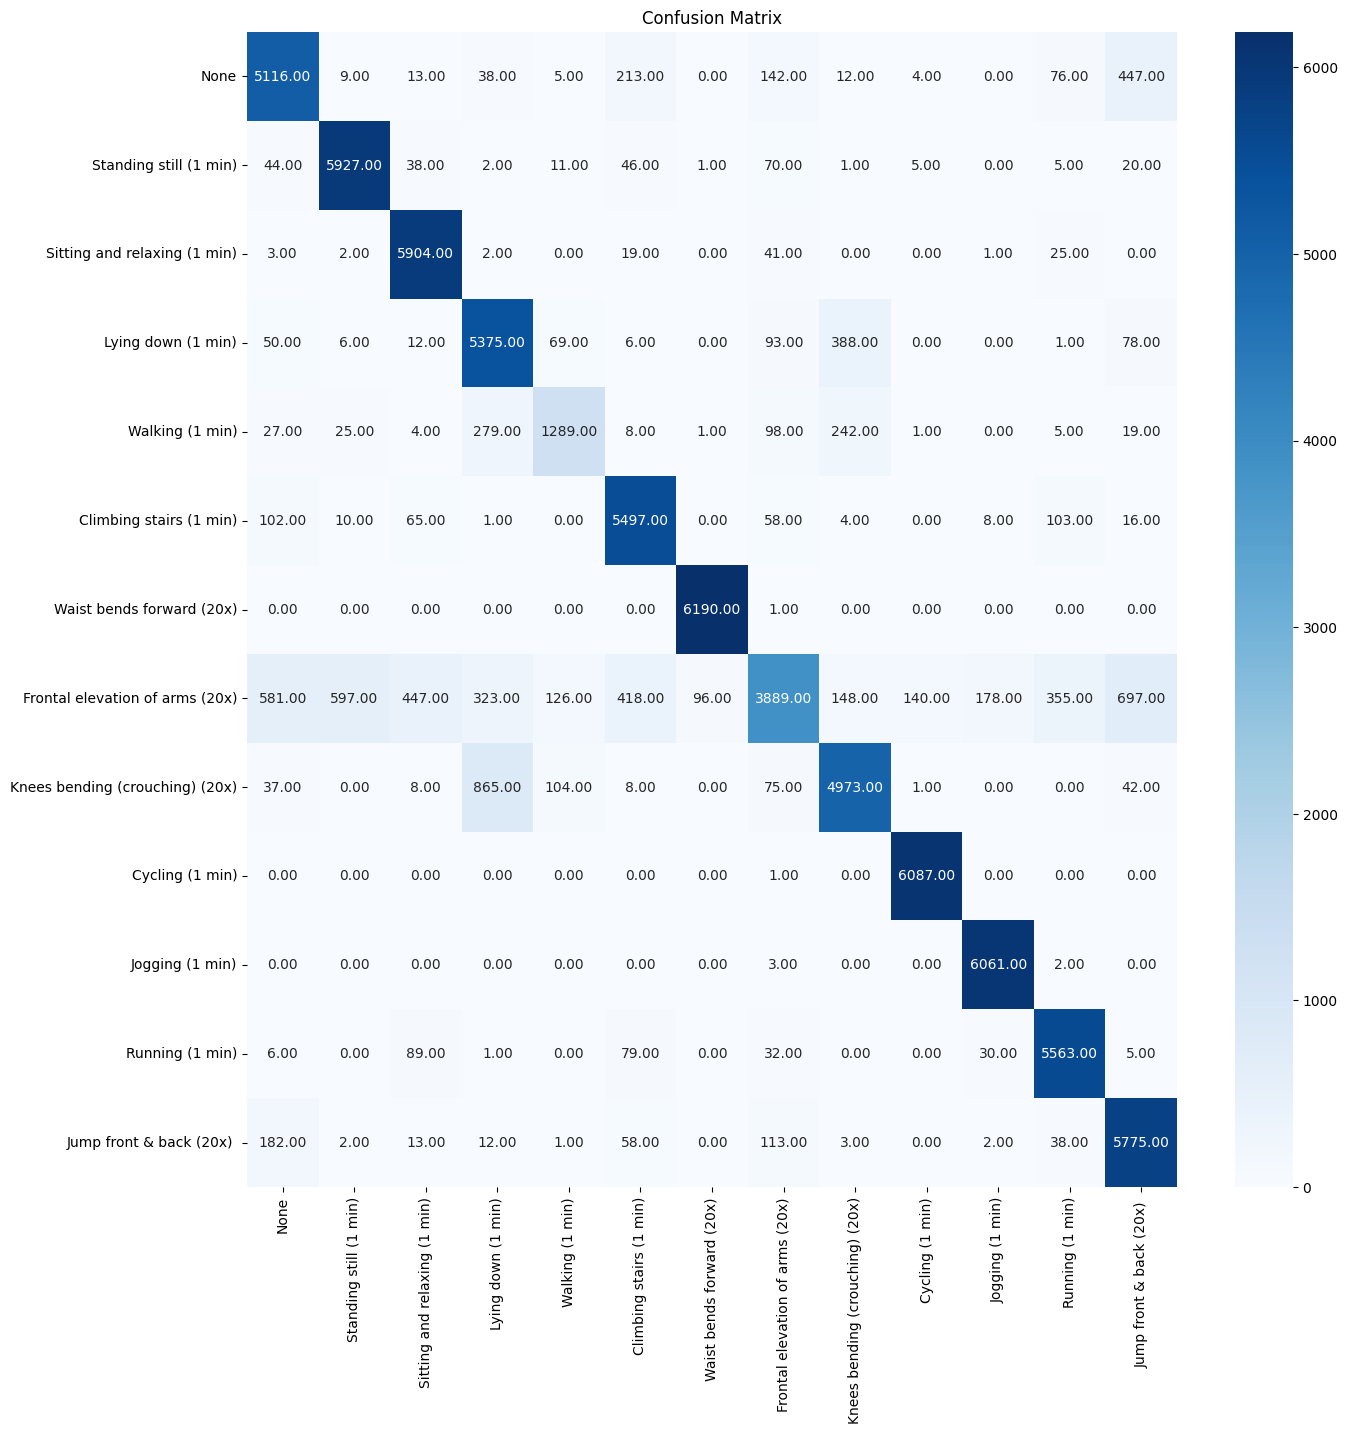

Accuracy Score : 88.2658%
Precision Score : 87.8510%
Recall Score : 88.0219%
f1 Score : 87.3962%


In [70]:
resultSummarizer(Y_test,X_test_prediction)

In [73]:
knn2 = KNeighborsClassifier(n_neighbors = 10)
knn2.fit(X_train_scaled,Y_train)
X_test_prediction = knn2.predict(X_test_scaled)

In [80]:
resultSummarizer(Y_test,X_test_prediction,cm=False)

Accuracy Score : 93.2371%
Precision Score : 93.1427%
Recall Score : 92.8383%
f1 Score : 92.5090%


In [83]:
for n in range(1,11):
  knn=KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train_scaled,Y_train)
  prediction = knn1.predict(X_test_scaled)
  print(f"=============No of neighbors:{n}=====================\n")
  resultSummarizer(Y_test,prediction,cm=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


=============No of neighbors:1=====================

Accuracy Score : 2.6436%
Precision Score : 8.9963%
Recall Score : 7.4948%
f1 Score : 0.6368%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


=============No of neighbors:2=====================

Accuracy Score : 2.6436%
Precision Score : 8.9963%
Recall Score : 7.4948%
f1 Score : 0.6368%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


=============No of neighbors:3=====================

Accuracy Score : 2.6436%
Precision Score : 8.9963%
Recall Score : 7.4948%
f1 Score : 0.6368%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


=============No of neighbors:4=====================

Accuracy Score : 2.6436%
Precision Score : 8.9963%
Recall Score : 7.4948%
f1 Score : 0.6368%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


=============No of neighbors:5=====================

Accuracy Score : 2.6436%
Precision Score : 8.9963%
Recall Score : 7.4948%
f1 Score : 0.6368%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


=============No of neighbors:6=====================

Accuracy Score : 2.6436%
Precision Score : 8.9963%
Recall Score : 7.4948%
f1 Score : 0.6368%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


=============No of neighbors:7=====================

Accuracy Score : 2.6436%
Precision Score : 8.9963%
Recall Score : 7.4948%
f1 Score : 0.6368%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


=============No of neighbors:8=====================

Accuracy Score : 2.6436%
Precision Score : 8.9963%
Recall Score : 7.4948%
f1 Score : 0.6368%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


=============No of neighbors:9=====================

Accuracy Score : 2.6436%
Precision Score : 8.9963%
Recall Score : 7.4948%
f1 Score : 0.6368%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


=============No of neighbors:10=====================

Accuracy Score : 2.6436%
Precision Score : 8.9963%
Recall Score : 7.4948%
f1 Score : 0.6368%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [82]:
dect = DecisionTreeClassifier(max_depth=14)
dect.fit(X_train_scaled,Y_train)
Y_prediction = dect.predict(X_test_scaled)
resultSummarizer(Y_test,Y_prediction,cm=False)

Accuracy Score : 86.9362%
Precision Score : 86.3516%
Recall Score : 86.7880%
f1 Score : 86.3049%
